# EVALUACION FINAL - MODULO 3 - BEATRIZ SÁNCHEZ
## -- FASE 1: Exploración y Limpieza

In [1]:
# Importaciones de las librerías necesarias
# Tratamiento de datos
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables y la distribución de las variables
from scipy.stats import shapiro, kstest, poisson, chisquare, ttest_ind, levene, bartlett, sem
import scipy.stats as stats

# Pruebas y test
from itertools import combinations
from scipy.stats import shapiro, kstest

# Configuración
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Apertura y carga de los conjuntos de datos en DataFrames
customer_loyalty_history = pd.read_csv("Customer Loyalty History.csv")
customer_flight_activity = pd.read_csv("Customer Flight Activity.csv")

In [3]:
customer_flight_activity.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [4]:
customer_loyalty_history.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


## 1.1 Exploración Inicial:

- Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.

- Une los dos conjuntos de datos de la forma más eficiente.

In [5]:
# Función creada para la realización de la exploración inicial.
def exploracion_general(dataframe):
    """Esta función proporciona una descripción personalizada de un DataFrame,
    incluyendo estadísticas descriptivas y tipos de datos de cada columna.
    
    Argumentos:
    dataframe : DataFrame de Pandas
        El DataFrame para el cual se generará la descripción
        
    La función no tiene return pero devuelve varios prints con la información necesaria:
    - describe separados por columnas numéricas y categóricas
    - dtypes por columna
    - shape
    - info
    - total de nulos
    - total de duplicados"""

    print(f"------EXPLORACIÓN DATAFRAME {dataframe}------")
    print("-------Descripción numéricas:---------")
    print(dataframe.describe())
    
    if any(dataframe.dtypes == 'object'):
        print("-------Descripción categóricas:---------")
        print(dataframe.describe(include="O"))
    else:
        print("No hay columnas categóricas en este DataFrame.")

    print("------Tipos:---------")
    print(dataframe.dtypes)
    print("------Forma del DataFrame:------")
    print(dataframe.shape)
    print("------Información:---------")
    print(dataframe.info())
    print("------Nulos:---------")
    print(dataframe.isnull().sum())
    print("------Duplicados:---------")
    print(dataframe.duplicated().sum())

def exploracion_columna(dataframe):
    for columna in list(dataframe.columns):
        print(f" \n----------- ANALIZANDO LA COLUMNA: '{columna.upper()}' -----------\n")
        print(f"* Número de datos: {len(dataframe[columna].to_list())}")
        print(f"* Frecuencia de valores en la columna: \n {dataframe[columna].value_counts()}")
        print(f"* Datos únicos en la columna: {len(dataframe[columna].unique())}")
        print(f"* Los valores son de tipo: {dataframe[columna].dtype}")
        print(f"* La suma de datos nulos: {dataframe[columna].isnull().sum()}")
        print(f"* Valores únicos: {dataframe[columna].unique()}")

# Usar la función exploracion_general con customer_loyalty_history
exploracion_general(customer_loyalty_history)

# Usar la función exploracion_columna con customer_loyalty_history
exploracion_columna(customer_loyalty_history)

# Usar la función exploracion_general con customer_flight_activity
exploracion_general(customer_flight_activity)

# Usar la función exploracion_columna con customer_flight_activity
exploracion_columna(customer_flight_activity)


------EXPLORACIÓN DATAFRAME        Loyalty Number Country          Province        City Postal Code  \
0              480934  Canada           Ontario     Toronto     M2Z 4K1   
1              549612  Canada           Alberta    Edmonton     T3G 6Y6   
2              429460  Canada  British Columbia   Vancouver     V6E 3D9   
3              608370  Canada           Ontario     Toronto     P1W 1K4   
4              530508  Canada            Quebec        Hull     J8Y 3Z5   
...               ...     ...               ...         ...         ...   
16732          823768  Canada  British Columbia   Vancouver     V6E 3Z3   
16733          680886  Canada      Saskatchewan      Regina     S1J 3C5   
16734          776187  Canada  British Columbia   Vancouver     V5R 1W3   
16735          906428  Canada             Yukon  Whitehorse     Y2K 6R0   
16736          652627  Canada          Manitoba    Winnipeg     R2C 0M5   

       Gender Education    Salary Marital Status Loyalty Card       CLV

### Identificación de posibles problemas:

Dataframe `customer_loyalty_history`:
- Valores atípicos en Salary: Existen valores negativos en la columna Salary, lo cual es inusual y podría ser un error de entrada de datos o un problema en el procesamiento de los datos.
- Datos faltantes en Salary: Hay 4238 datos faltantes en la columna Salary, lo que podría afectar el análisis si no se manejan correctamente.
- Cancelaciones con datos faltantes: Las columnas Cancellation Year y Cancellation Month tienen muchos datos faltantes (14670). Esto podría afectar cualquier análisis relacionado con la cancelación de suscripciones de los clienes en las empresas.
- Duplicados: No se encontraron datos duplicados en este conjunto de datos.
- Datos de un solo país: Todos los registros en la columna Country indican que los datos son de Canadá. Si esto no es representativo de la verdadera diversidad de la base de clientes, podría ser un problema.

In [6]:
# Valores atípicos en Salary
valores_atipicos_salario = customer_loyalty_history[customer_loyalty_history["Salary"] < 0]
print(f"Valores atípicos en Salary: {len(valores_atipicos_salario)} valores negativos encontrados.")

# Datos faltantes en Salary
datos_faltantes_salario = customer_loyalty_history["Salary"].isnull().sum()
print(f"Datos faltantes en Salary: {datos_faltantes_salario} datos faltantes encontrados.")

# Cancelaciones con datos faltantes
datos_faltantes_cancelacion = customer_loyalty_history[["Cancellation Year", "Cancellation Month"]].isnull().sum().sum()
print(f"Cancelaciones con datos faltantes: {datos_faltantes_cancelacion} datos faltantes encontrados en las columnas de cancelación.")

# Duplicados
duplicados = customer_loyalty_history.duplicated().sum()
print(f"Duplicados: {duplicados} datos duplicados encontrados.")

# Datos de un solo país
paises = customer_loyalty_history["Country"].unique()
if len(paises) == 1 and paises[0] == 'Canada':
    print("Datos de un solo país: Todos los registros son de Canadá.")
else:
    print("Datos de un solo país: No todos los registros son de Canadá.")


Valores atípicos en Salary: 20 valores negativos encontrados.
Datos faltantes en Salary: 4238 datos faltantes encontrados.
Cancelaciones con datos faltantes: 29340 datos faltantes encontrados en las columnas de cancelación.
Duplicados: 0 datos duplicados encontrados.
Datos de un solo país: Todos los registros son de Canadá.


Dataframe `customer_flight_activity`: 
- Datos duplicados: Se encontraron 1864 filas duplicadas en este conjunto de datos, lo cual podría afectar cualquier análisis que se base en la unicidad de las entradas.
- Datos de un solo año: Los datos solo abarcan los años 2017 y 2018. Si se necesita un análisis a lo largo del tiempo, esta limitación podría ser un problema.
- Alta proporción de cero en Distance: La columna Distance tiene una cantidad significativa de ceros (es de 48.81%), lo cual puede ser inusual dependiendo del contexto de los datos.
- Relación entre Points Accumulated y Points Redeemed: La descripción de la columna Points Accumulated indica que su valor máximo es 676.5, mientras que el valor máximo de Points Redeemed es 876. Esto sugiere que los puntos canjeados pueden exceder los puntos acumulados, lo cual puede ser un problema dependiendo de las reglas del programa de lealtad.

In [7]:
# Datos duplicados
duplicados = len(customer_flight_activity[customer_flight_activity.duplicated()])
print(f"Datos duplicados: Se encontraron {duplicados} filas duplicadas en este conjunto de datos.")

# Datos de un solo año
años_presentes = customer_flight_activity["Year"].unique()
print(f"Datos de un solo año: Los años presentes en los datos son {años_presentes}.")

# Alta proporción de cero en Distance
proporcion_ceros = (customer_flight_activity["Distance"] == 0).mean()
print(f"Alta proporción de cero en Distance: La proporción de ceros en la columna Distance es {proporcion_ceros:.2%}.")

# Relación entre Points Accumulated y Points Redeemed
max_accumulated_points = customer_flight_activity["Points Accumulated"].max()
max_redeemed_points = customer_flight_activity["Points Redeemed"].max()
print(f"Relación entre Points Accumulated y Points Redeemed:")
print(f"  - Valor máximo de Points Accumulated: {max_accumulated_points}")
print(f"  - Valor máximo de Points Redeemed: {max_redeemed_points}")

Datos duplicados: Se encontraron 1864 filas duplicadas en este conjunto de datos.
Datos de un solo año: Los años presentes en los datos son [2017 2018].
Alta proporción de cero en Distance: La proporción de ceros en la columna Distance es 48.81%.
Relación entre Points Accumulated y Points Redeemed:
  - Valor máximo de Points Accumulated: 676.5
  - Valor máximo de Points Redeemed: 876


In [8]:
# Unión de los dataframes. Uso del método merge de Pandas con un inner join basado en la columna clave 'Loyalty Number'.
# Esto se debe a que ambas tablas continene información sobre la lealtad del cliente y las actividades de vuelo, y la columna 'Loyalty Number' parece ser la clave principal que las relaciona.

# Antes de la unión , procedemos a eliminar filas con valores nulos en columnas clave en ambos conjuntos de datos
customer_loyalty_history.dropna(subset=["Loyalty Number"], inplace=True)
customer_flight_activity.dropna(subset=["Loyalty Number"], inplace=True)

In [9]:
# Unir los dos conjuntos de datos en base a la columna 'Loyalty Number', uso de inner join, tambien se puede utilizar left join, dado que se obtendria la misma solución.
merged_data = pd.merge(customer_loyalty_history, customer_flight_activity, on="Loyalty Number", how='inner')
merged_data

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.0,465,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,8,0,0,0,0,0.0,0,0
405620,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,9,0,0,0,0,0.0,0,0
405621,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,10,0,0,0,0,0.0,0,0
405622,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,11,0,0,0,0,0.0,0,0


1.2 Limpieza de Datos:

- Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.

- Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.

- Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

In [10]:
# Verificar que no haya datos faltantes después de la unión
print("Datos faltantes en el conjunto de datos combinado:")
print(merged_data.isnull().sum())

Datos faltantes en el conjunto de datos combinado:
Loyalty Number                      0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0

In [11]:
# Calcular el porcentaje de datos faltantes para cada columna
missing_percentage = (merged_data.isnull().sum() / len(merged_data)) * 100

# Imprimir el porcentaje de datos faltantes
print("Porcentaje de datos faltantes en el conjunto de datos combinado:")
print(missing_percentage)

Porcentaje de datos faltantes en el conjunto de datos combinado:
Loyalty Number                  0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.312112
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.657535
Cancellation Month             87.657535
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0

In [12]:
# Interpretación: El resultado de la verificación de datos faltantes en el conjunto de datos combinado muestra que hay valores nulos en las columnas Salary, Cancellation Year y Cancellation Month.
# - La columna Salary tiene 102672 valores nulos. Siendo un 25,31%.
# - Las columnas Cancellation Year y Cancellation Month tienen 355560 valores nulos. Siendo un 87,66%.

In [13]:
merged_data["Cancellation Year"].unique()

array([  nan, 2018., 2015., 2017., 2014., 2016., 2013.])

In [14]:
merged_data["Cancellation Year"].value_counts()

Cancellation Year
2018.0    15648
2017.0    12192
2016.0    10272
2015.0     6480
2014.0     4416
2013.0     1056
Name: count, dtype: int64

In [15]:
merged_data["Cancellation Month"].unique()

array([nan,  1., 12.,  4.,  2.,  7., 11.,  5.,  6., 10.,  8.,  9.,  3.])

In [16]:
merged_data["Cancellation Month"].value_counts()

Cancellation Month
11.0    5160
12.0    5112
8.0     5112
7.0     4560
10.0    4368
9.0     4224
6.0     3984
1.0     3744
3.0     3600
5.0     3576
2.0     3336
4.0     3288
Name: count, dtype: int64

In [17]:
# Eliminar filas con valores nulos en cualquiera de las columnas especificadas
merged_data.drop(columns=["Cancellation Year", "Cancellation Month"], inplace=True)

In [18]:
# Tras la examinación, se procede a la eliminación de las columnas "Cancellation Year", "Cancellation Month", justificación:
# - Necesidad de datos completos para el análisis temporal
# - Evitar errores en el análisis
# - Impacto mínimo en el conjunto de datos

# Se han eliminado 388887 datos de clientes que no han cancelado, representando una proporción relativamente pequeña del conjunto de datos total.
# Se ha priorizado la calidad y la integridad de los datos utilizados en el análisis puede conducir a resultados más confiables y significativos en última instancia. 

In [19]:
merged_data

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2018,10,6,2,8,3352,335.0,465,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2018,8,0,0,0,0,0.0,0,0
405620,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2018,9,0,0,0,0,0.0,0,0
405621,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2018,10,0,0,0,0,0.0,0,0
405622,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2018,11,0,0,0,0,0.0,0,0


In [20]:
# Tratamiento de la columna "Salary"

In [21]:
merged_data["Salary"].value_counts()

Salary
 101933.0    552
 51573.0     336
 61809.0     336
 62283.0     336
 76159.0     312
            ... 
 74431.0      24
 93296.0      24
 98020.0      24
 71960.0      24
-57297.0      24
Name: count, Length: 5890, dtype: int64

In [22]:
merged_data["Salary"].unique()

array([ 83236.,     nan, 103495., ...,  76178.,  91970., -57297.])

In [31]:
# Iterar sobre los valores de la columna Salary y convertir los negativos a NaN
for i in range(len(merged_data)):
    if merged_data.loc[i, 'Salary'] < 0:
        merged_data.loc[i, 'Salary'] = np.nan
     # Detener el bucle si encontramos un valor negativo
    if merged_data.loc[i, 'Salary'] < 0:
        break

In [33]:
# Convertir valores negativos de la columna Salary a NaN
merged_data["Salary"] = merged_data["Salary"].apply(lambda x: np.nan if x < 0 else x)

In [32]:
# Verificar que no haya datos faltantes después de los cambios
print("Datos faltantes en el conjunto de datos combinado después de eliminar filas y cambiar valores:")
print(merged_data.isnull().sum())

Datos faltantes en el conjunto de datos combinado después de eliminar filas y cambiar valores:
Loyalty Number                      0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         103152
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
dtype: int64


## -- FASE 2: Visualización

Contesta a las siguientes gráficas usando la mejor gráfica que consideres:

2.1 ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

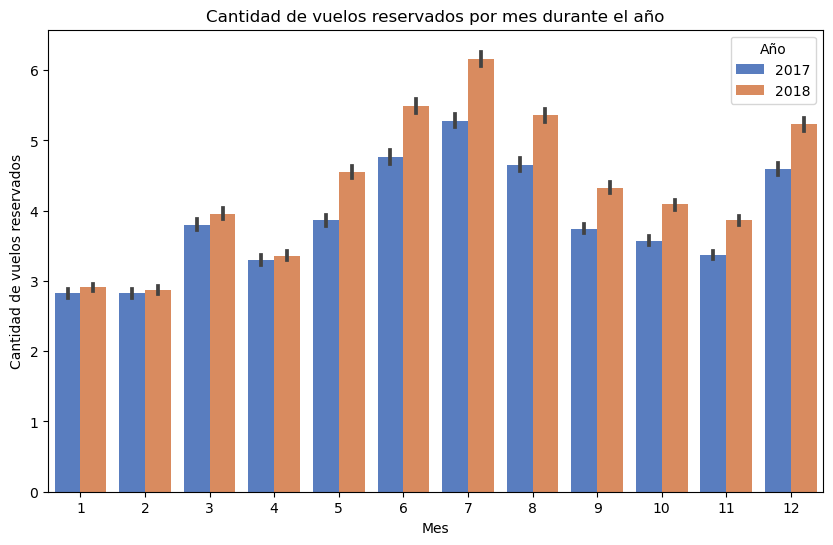

In [61]:
# Distribución de la cantidad de vuelos reservados por mes durante el año (2017, 2018)
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_data, x='Month', y='Flights Booked', hue='Year', palette='muted')
plt.title('Cantidad de vuelos reservados por mes durante el año')
plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos reservados')
plt.legend(title='Año')
plt.show()

In [ ]:
# Uso de gráfica: countplot o gráfica de barras.
# Interpretación: 
# Conclusión:

2.2 ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

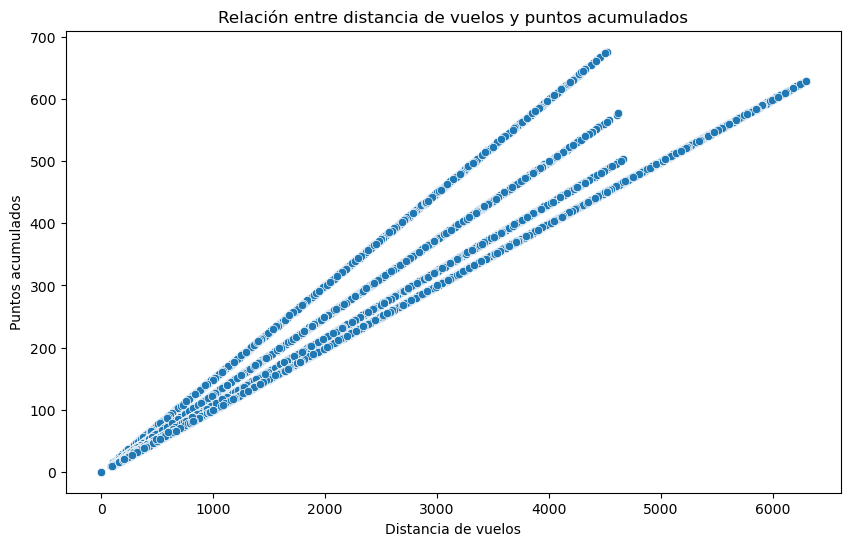

In [37]:
# Relación entre la distancia de los vuelos y los puntos acumulados por los clientes
plt.figure(figsize=(10, 6)) # Establece el tamaño de la figura
sns.scatterplot(data=merged_data, x='Distance', y='Points Accumulated') # Crea un gráfico de dispersión con los datos de distancia y puntos acumulados
plt.title('Relación entre distancia de vuelos y puntos acumulados') # Establece el título del gráfico
plt.xlabel('Distancia de vuelos') # Etiqueta del eje x
plt.ylabel('Puntos acumulados') # Etiqueta del eje y
plt.show() # Muestra el gráfico

In [ ]:
# Uso de gráfica: scatterplot o gráfico de dispersión.
# Interpretación: Esta gráfica de dispersión muestra la relación entre la distancia de los vuelos y los puntos acumulados por los clientes. Cada punto en el gráfico representará un cliente, y su posición en el gráfico mostrará cuántos puntos han acumulado en relación con la distancia de sus vuelos.
# Conclusión: Puesto que las líneas son ascendentes, significa que hay una tendencia positiva entre la distancia de los vuelos y los puntos acumulados, es decir, a medida que la distancia de los vuelos aumenta, también lo hacen los puntos acumulados.

2.3 ¿Cuál es la distribución de los clientes por provincia o estado?

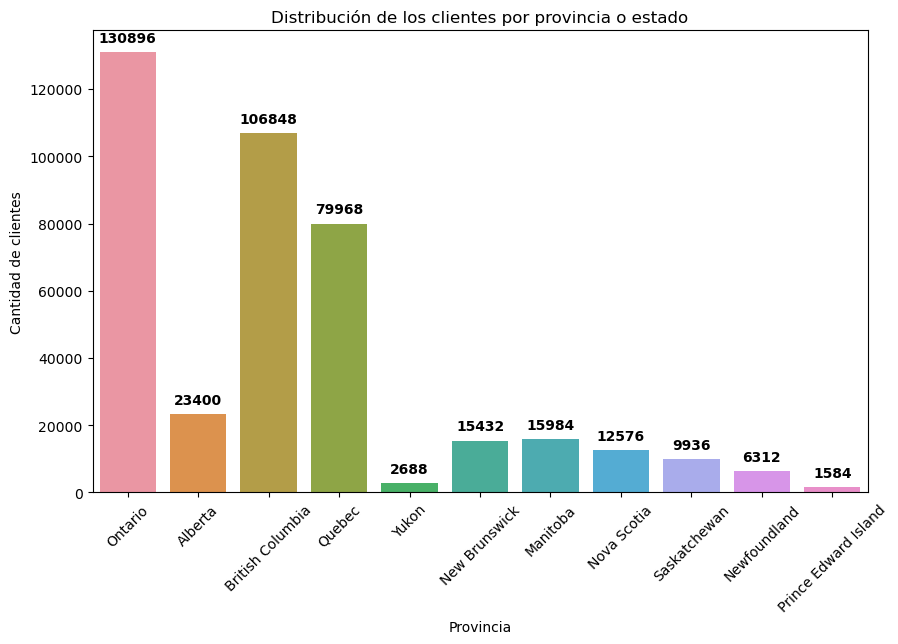

In [58]:
# Distribución de los clientes por provincia o estado
plt.figure(figsize=(10, 6))  # Establece el tamaño de la figura
ax = sns.countplot(data=merged_data, x='Province')  # Crea un gráfico de recuento (countplot) utilizando los datos de la columna 'Province'
plt.title('Distribución de los clientes por provincia o estado')  # Establece el título del gráfico
plt.xlabel('Provincia')  # Etiqueta del eje x
plt.ylabel('Cantidad de clientes')  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mayor legibilidad

# Agregar etiquetas encima de las barras
for indice, valor in enumerate(ax.patches):  # Itera sobre las barras del gráfico
    plt.text(indice, valor.get_height() + 3000, str(int(valor.get_height())),  # Agrega texto sobre cada barra indicando la cantidad de clientes
             horizontalalignment='center', fontweight='bold')  # Alinea el texto al centro y lo hace negrita

plt.show()  # Muestra el gráfico

In [ ]:
# Uso de gráfica: countplot o gráfica de barras.
# Interpretación: Esta gráfica muestra la cantidad de clientes en cada provincia o estado. Cada barra representa una provincia o estado, y la altura de la barra indica el número de clientes en esa ubicación.
# Conclusión: Observamos la distribución geográfica de los clientes, ayuda a identificar áreas con mayor concentración de clientes (Ontario, British Columbia y Quebec) y dirigir estrategias de marketing o servicio al cliente en consecuencia.

2.4 ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [60]:
merged_data["Education"].value_counts()

Education
Bachelor                253752
College                 102672
High School or Below     19008
Doctor                   17856
Master                   12336
Name: count, dtype: int64

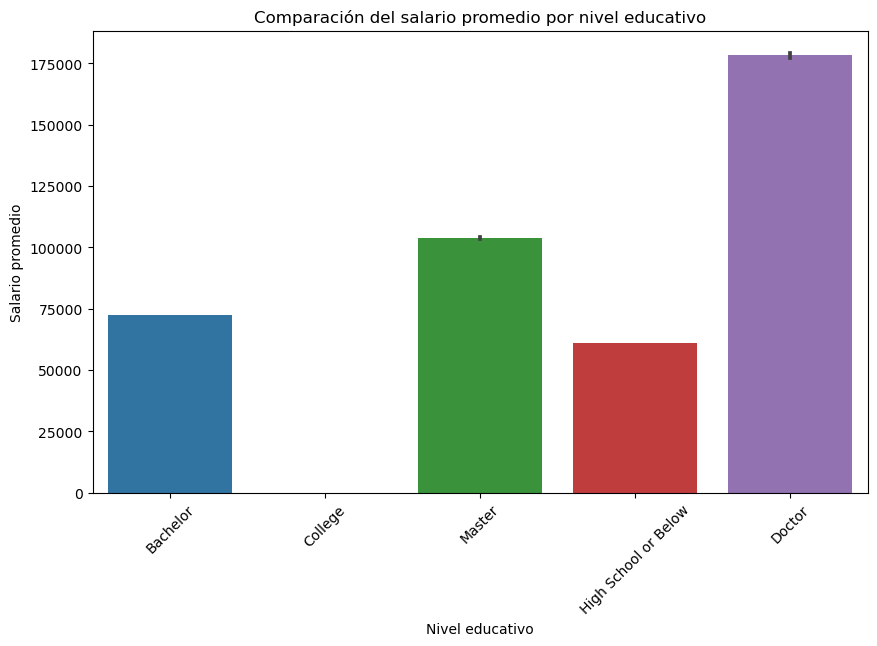

In [39]:
# Comparación del salario promedio entre los diferentes niveles educativos de los clientes
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_data, x='Education', y='Salary', estimator=np.mean)
plt.title('Comparación del salario promedio por nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Salario promedio')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 
# Explicación: 

In [ ]:
Interpretación: Este gráfico de barras compara el salario promedio entre diferentes niveles educativos de los clientes. Cada barra representa un nivel educativo, y la altura de la barra indica el salario promedio de los clientes en ese nivel.
Conclusión: Se observa una variación en el salario promedio según el nivel educativo, lo que puede tener implicaciones en términos de poder adquisitivo y comportamiento del consumidor.

2.5 ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

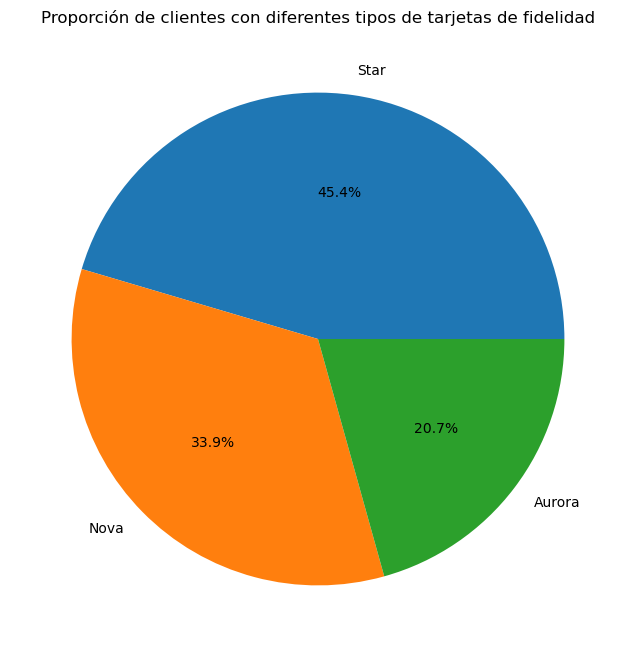

In [40]:
# Proporción de clientes con diferentes tipos de tarjetas de fidelidad
plt.figure(figsize=(8, 8))
merged_data['Loyalty Card'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de clientes con diferentes tipos de tarjetas de fidelidad')
plt.ylabel('')
plt.show()

colors = ['mediumslateblue', 'purple', 'rebeccapurple', 'blueviolet' ,'indigo'] # para establecer los colores

explode = ( 0.1 ,0, 0.5, 0, 0.1) # para sacar los quesitos hacia fuera

plt.figure(figsize=(10,10))

plt.pie(df_pie['price'], 
       labels = df_pie["reference_unit"], 
       colors = colors, # para cambiar el color de la gráfica
       explode = explode)  # para sacar los quesitos hacia fuera

plt.title("Precio medio por unidades", color = "white", fontsize = 16, fontweight = "bold") # para poner el título
plt.legend(bbox_to_anchor=(1.2, 1)) # sacar leyenda y donde colocarla. El primer índice (derecha-izquierda), segundo índice(arriba, abajo) )
plt.show();

In [ ]:
# Uso de gráfica: Pieplot o gráfico de quesitos
# Explicación: 

In [ ]:
Interpretación: Este gráfico circular muestra la proporción de clientes que tienen diferentes tipos de tarjetas de fidelidad. Cada porción del círculo representa un tipo de tarjeta de fidelidad, y el valor porcentual indica la proporción de clientes con esa tarjeta.
Conclusión: Podemos ver la distribución de la base de clientes en función de los diferentes programas de fidelización, lo que puede ser útil para comprender la efectividad de cada programa.

2.6 ¿Cómo se distribuyen los clientes según su estado civil y género?

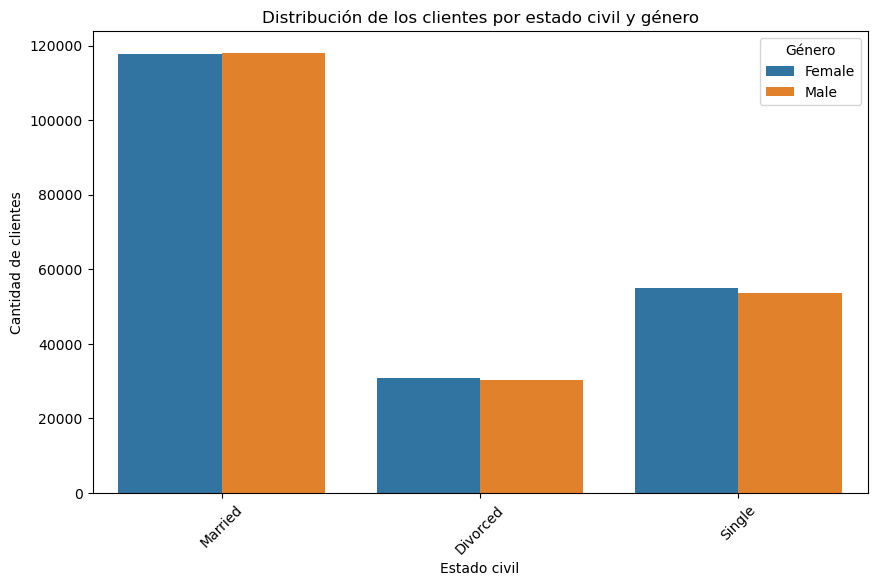

In [42]:
# Distribución de los clientes según su estado civil y género
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='Marital Status', hue='Gender')
plt.title('Distribución de los clientes por estado civil y género')
plt.xlabel('Estado civil')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.show()

In [ ]:
# Explicación: 

In [ ]:
Interpretación: Este gráfico de barras apiladas muestra la distribución de los clientes según su estado civil y género. Cada barra representa un estado civil, dividido en segmentos según el género de los clientes.
Conclusión: Se puede observar la distribución de género dentro de cada categoría de estado civil, lo que puede proporcionar información sobre la demografía de la base de clientes.

## -- Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Objetivo del Ejercicio: Se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:

3.1 Preparación de Datos:

- Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

3.2 Análisis Descriptivo:

- Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.

3.3 Prueba Estadística:

- Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.